# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [17]:
parsed_content 

<!DOCTYPE html>

<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-GB">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<title>British Airways Customer Reviews - SKYTRAX</title>
<!-- Google Chrome Frame for IE -->
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<!-- mobile meta -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport">
<!-- icons & favicons -->
<link href="https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/apple-icon-touch.png" rel="apple-tou

In [7]:
url

'https://www.airlinequality.com/airline-reviews/british-airways/page/10/?sortby=post_date%3ADesc&pagesize=100'

In [11]:
response.status_code # success

200

In [25]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Pretty good flight but sti...
1,"✅ Trip Verified | Check in was fine, but no pr..."
2,✅ Trip Verified | British Airways is absolute ...
3,✅ Trip Verified | The flight time was changed ...
4,✅ Trip Verified | I'm so fraustrated. My fli...


In [45]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [53]:
df.reviews

0         Pretty good flight but still some small thi...
1       Check in was fine, but no priority/fast track...
2       British Airways is absolute rubbish. I had to...
3       The flight time was changed at the last minut...
4         I'm so fraustrated. My flight was cancelled...
                             ...                        
995      London to Munich. The plane is A320. The sea...
996      London to Glasgow. BA customer service is un...
997      The seating configuration meant that we were...
998     No problems at the airport in Vienna, it was ...
999      Malaga to London Heathrow . A shambolic airl...
Name: reviews, Length: 1000, dtype: object

Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining 

Step 1: Cleani

In [47]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Pretty good flight but still some small thi...,Pretty good flight but still some small thing...
1,"Check in was fine, but no priority/fast track...",Check in was fine but no priority fast track ...
2,British Airways is absolute rubbish. I had to...,British Airways is absolute rubbish I had to ...
3,The flight time was changed at the last minut...,The flight time was changed at the last minut...
4,I'm so fraustrated. My flight was cancelled...,I m so fraustrated My flight was cancelled la...


In [ ]:
Step 2: Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

In [55]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Suga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Suga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Pretty good flight but still some small thi...,Pretty good flight but still some small thing...,"[(Pretty, r), (good, a), (flight, n), (still, ...",Pretty good flight still small thing improve...
1,"Check in was fine, but no priority/fast track...",Check in was fine but no priority fast track ...,"[(Check, n), (fine, a), (priority, n), (fast, ...",Check fine priority fast track line security...
2,British Airways is absolute rubbish. I had to...,British Airways is absolute rubbish I had to ...,"[(British, a), (Airways, n), (absolute, a), (r...",British Airways absolute rubbish fly Amsterd...
3,The flight time was changed at the last minut...,The flight time was changed at the last minut...,"[(flight, n), (time, n), (changed, v), (last, ...",flight time change last minute without warn ...
4,I'm so fraustrated. My flight was cancelled...,I m so fraustrated My flight was cancelled la...,"[(fraustrated, a), (flight, n), (cancelled, v)...",fraustrated flight cancel last minute end wo...


In [69]:
!pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ---------------------------------------  122.9/126.0 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.5 MB/s eta 0:00:00


In [71]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()


,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Pretty good flight but still some small thi...,Pretty good flight but still some small thing...,"[(Pretty, r), (good, a), (flight, n), (still, ...",Pretty good flight still small thing improve...,0.9937,Positive
1,"Check in was fine, but no priority/fast track...",Check in was fine but no priority fast track ...,"[(Check, n), (fine, a), (priority, n), (fast, ...",Check fine priority fast track line security...,0.9668,Positive
2,British Airways is absolute rubbish. I had to...,British Airways is absolute rubbish I had to ...,"[(British, a), (Airways, n), (absolute, a), (r...",British Airways absolute rubbish fly Amsterd...,-0.6300,Negative
3,The flight time was changed at the last minut...,The flight time was changed at the last minut...,"[(flight, n), (time, n), (changed, v), (last, ...",flight time change last minute without warn ...,0.3391,Neutral
4,I'm so fraustrated. My flight was cancelled...,I m so fraustrated My flight was cancelled la...,"[(fraustrated, a), (flight, n), (cancelled, v)...",fraustrated flight cancel last minute end wo...,-0.8729,Negative


In [73]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    460
Negative    429
Neutral     111
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x196961856d0>,
 [Text(0.13786652831108215, 1.0913261750601648, 'Positive'),
  Text(-0.502466156512605, -0.9785334749304443, 'Negative'),
  Text(1.2687461318934807, -0.4612843513553554, 'Neutral')],
 [Text(0.07519992453331752, 0.5952688227600899, '46.0%'),
  Text(-0.2740724490068754, -0.5337455317802423, '42.9%'),
  Text(0.7988401571181173, -0.29043829529781634, '11.1%')])

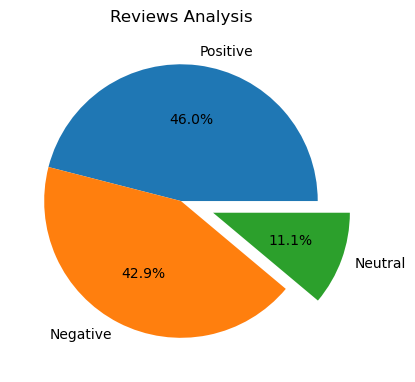

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [99]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

stopwords.extend(["--","-",'mr','me','us','let','new','know'])

In [101]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ------------- -------------------------- 102.4/301.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [103]:
from wordcloud import WordCloud,STOPWORDS

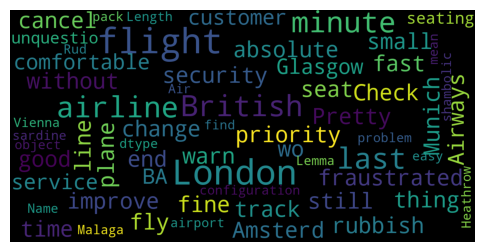

In [117]:

stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(6, 6))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)


In [85]:
 all_words_freq_R= nltk.FreqDist(df['Lemma'])

In [89]:
 most_common = [item for item in all_words_freq_R.most_common(3)]

In [93]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']